In [2]:
'''
Title:  Darstellung der Messungen 2. Labortermin --> erweitertes Modell
Author: Kaufmann Stefan
Date:   05.06.2023
'''

# Requirements

# python 3.10.6
import numpy as np
import matplotlib.pyplot as plt
import libopc as libs  
import pandas as pd

import libKosten as libk
import Parameter as param
from scipy.signal import find_peaks

# 1. Importieren der Messwerte

In [66]:
path = "2_Messungen/quad/"
#path = "2_Messungen/timeoptimal/"

# Import Files
Quanser_meas_file = pd.read_excel(path+"1.xlsx")  # Phi 1
Quanser_V_file  = pd.read_excel(path+"3.xlsx")    # Input
Quanser_I_file  = pd.read_excel(path+"4.xlsx")    # Input

Quanser_meas_names = Quanser_meas_file.columns.tolist()
Quanser_V_names = Quanser_V_file.columns.tolist()
Quanser_I_names = Quanser_I_file.columns.tolist()

Quanser_meas = np.zeros_like(Quanser_meas_file)
for k in range(np.size(Quanser_meas_names)):
    Quanser_meas[:,k] =  Quanser_meas_file[Quanser_meas_names[k]]


Quanser_V = np.zeros_like(Quanser_V_file)
for k in range(np.size(Quanser_V_names)):
    Quanser_V[:,k] =  Quanser_V_file[Quanser_V_names[k]]

Quanser_I = np.zeros_like(Quanser_I_file)
for k in range(np.size(Quanser_I_names)):
    Quanser_I[:,k] =  Quanser_I_file[Quanser_I_names[k]]



In [77]:
T_Start = 0
T_Stop = 0

if 'timeoptimal' in path:
    T_Start = 10.7
    T_Stop = 11.7

if 'quad' in path:
    T_Start = 4.8
    T_Stop = 5.5  


dt = 1/1000

N_Start = int(T_Start/dt)
N_Stop = int(T_Stop/dt)

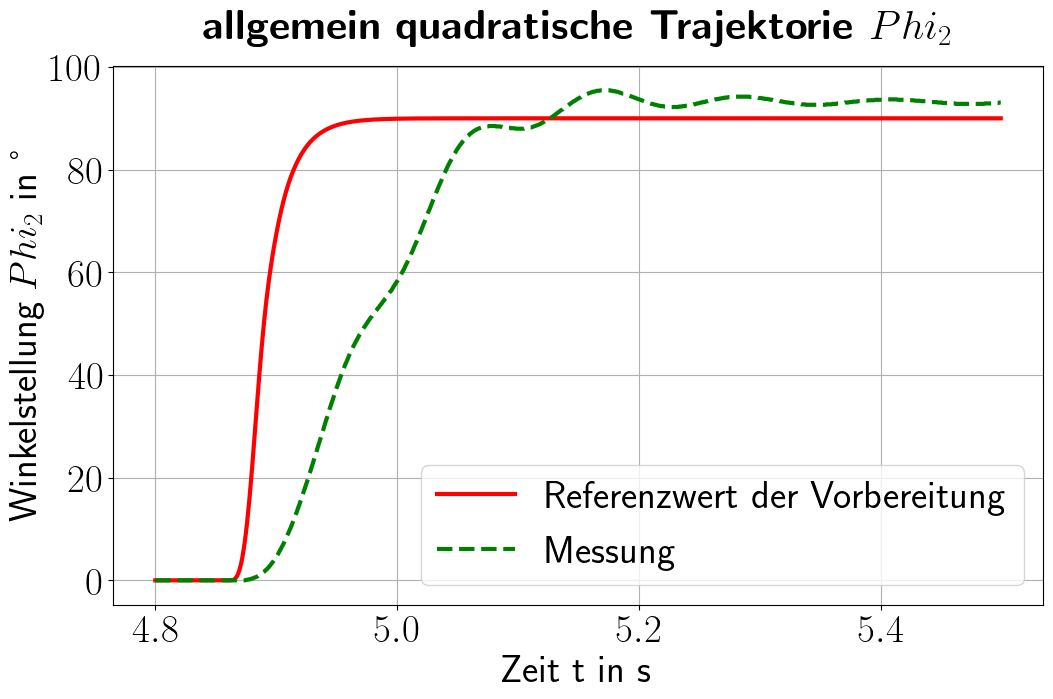

Abweichung vom Sollwert Phi 2:  -0.351562
Abweichung vom Sollwert Phi 1:  -0.176


In [78]:
# Phi 2 
k = 0   # Phi 2
#k = -2   #Phi 1
plt.figure(figsize=(12,7))
plt.plot(Quanser_meas[N_Start:N_Stop,0],Quanser_meas[N_Start:N_Stop,k+3], 'r', label = 'Referenzwert der Vorbereitung')
plt.plot(Quanser_meas[N_Start:N_Stop,0],Quanser_meas[N_Start:N_Stop,k+11], 'g', linestyle ='--' , label = 'Messung')
#plt.plot(Quanser_meas[N_Start:N_Stop,0],Quanser_meas[N_Start:N_Stop,k+7], 'b', linestyle =':' , linewidth ='2', label = 'Beobachter')
#plt.plot(Quanser_obs[:,k],Quanser_obs[:,k+1], 'g', linewidth ='2', label = 'observer')
plt.xlabel(r'Zeit t in s')
plt.ylabel(r'Winkelstellung $Phi_ {2}$ in °')
plt.grid()
if 'timeoptimal' in path:
    plt.title(r'\textbf{Zeitoptimale Trajektorie  $Phi_{2}$}',pad=20)
if 'energie' in path:
    plt.title(r'\textbf{Energieoptimale Trajektorie - offener Regelkreis}',pad=20)   
if 'quad' in path:     
    plt.title(r'\textbf{allgemein quadratische Trajektorie $Phi_{2}$', pad=20)   
#plt.axhline(y=90, color='r')
plt.legend(loc = 'lower right')
#plt.savefig(path + "Winkel.svg")
#plt.savefig(path+"Winkel_time2_Phi1.svg")
plt.show()

mittel = -1 #int((N_Start+N_Stop)/2)
print('Abweichung vom Sollwert Phi 2: ',(Quanser_meas[mittel,11]-Quanser_meas[mittel,3]))
print('Abweichung vom Sollwert Phi 1: ',np.round(Quanser_meas[mittel,11-2]-Quanser_meas[mittel,3-2],3))


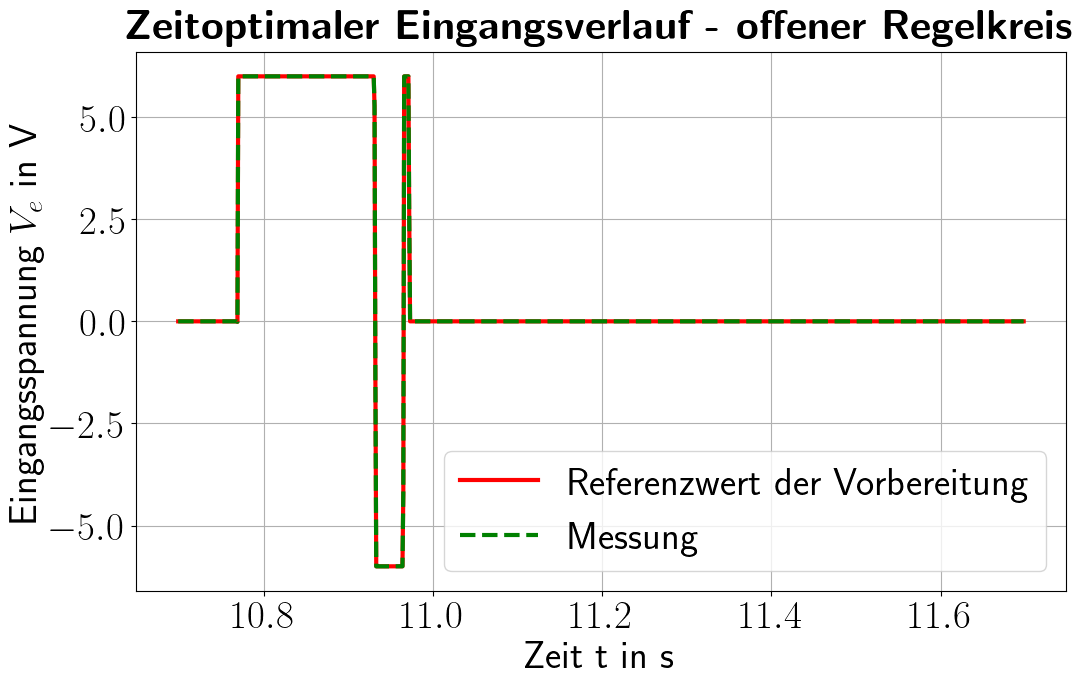

In [65]:
# Eingang

k = 0 
plt.figure(figsize=(12,7))
plt.plot(Quanser_V[N_Start:N_Stop,k],Quanser_V[N_Start:N_Stop,k+1], 'r',  label = 'Referenzwert der Vorbereitung')
plt.plot(Quanser_V[N_Start:N_Stop,k],Quanser_V[N_Start:N_Stop,k+5], 'g', linestyle ='--' ,  label = 'Messung')
#plt.plot(Quanser_V[N_Start:N_Stop,k],Quanser_V[N_Start:N_Stop,k+5], 'b', linestyle =':' , linewidth ='4', label = 'Beobachter')



plt.xlabel(r'Zeit t in s')
plt.ylabel(r'Eingangsspannung $V_ {e}$ in V')
plt.grid()
if 'timeoptimal' in path:
    plt.title(r'\textbf{Zeitoptimaler Eingangsverlauf - offener Regelkreis}',pad=10)    
if 'energie' in path:
    plt.title(r'\textbf{Energieoptimaler Eingangsverlauf - offener Regelkreis}',pad=10)         
if 'quad' in path:     
    plt.title(r'\textbf{allgemein quadratische Eingangsverlauf - offener Regelkreis}',pad=10 )   
#plt.axhline(y=90, color='r')
plt.legend(loc = 'lower right')
plt.savefig(path + "Eingang.svg")
plt.show()


# 2. Parameteridentifikation
$
k_{s}(\varphi_{1}-\varphi_{2}) = b_{2} \dot{\varphi} + \ddot{\varphi}_{2}  J_{1} -  b_{s}(\dot{\varphi}_{1}-\dot{\varphi}_{2}) \\
\begin{bmatrix}
\varphi_{1} - \varphi_{2}
\end{bmatrix}
\begin{bmatrix}
k_{s}
\end{bmatrix}
= b_{2} \dot{\varphi} + \ddot{\varphi}_{2}  J_{1} - (\dot{\varphi}_{1}- \dot{\varphi}_{2}) b_{s} \\
p = (A^{T}A)^{-1}Ay 
$

In [15]:
path = "2_Messungen/quad/"

# Import Files
Quanser_param = pd.read_excel(path+"5_Parameteridentifikation.xlsx")  # Phi 1
Quanser_param_names = Quanser_param.columns.tolist()

param_data = np.zeros_like(Quanser_param)
for k in range(np.size(Quanser_param_names)):
    param_data[:,k] =  Quanser_param[Quanser_param_names[k]]

Data = param_data[N_Start:N_Stop,:]#*np.pi/180

In [16]:
# Nummerisch Ableiten mittels zentrale Differenzen
phi2dd = np.zeros(len(Data[:,0]))

for i in range(1,len(Data[:,0])-1):
    h = 1/1000
    phi2dd[i]=(Data[i-1,3]+Data[i+1,3])/(2*h)

In [17]:
# Parameteridentifikation

A = np.zeros((len(Data[:,0]),1))

for i in range(1,len(Data[:,0])):
    #A[i,0] = phi2dd[i]
    #A[i,0] = (Data[i,3]-Data[i,2])
    A[i,0] = -(Data[i,1]-Data[i,0])
    

y = param.b2*Data[:,3]+param.J1*phi2dd[:]  - param.b1*(Data[:,3]-Data[:,2])

ks = np.linalg.inv(A.T@A)@A.T@y

print('Die Federkonstante ergibt sich zu : ',ks[0], ' [Nm/rad]')

#Die Qualität der Nummerischen Ableitung ist schlechter als die Diskerpatnz zum gesuchten Wert --> vgl. Vorwärtsdifferenzen
#Zur Verbesserung könnte man die Werte für phi2 interpoliren, sodass die Schrittweite beliebig verkleinert wird


Die Federkonstante ergibt sich zu :  0.7879751755891091  [Nm/rad]


Dämpfungsgrad  0.0007413009558876704
Frequenz:  10.060362173038232
Federsteifigkeit:  2.292062179370348


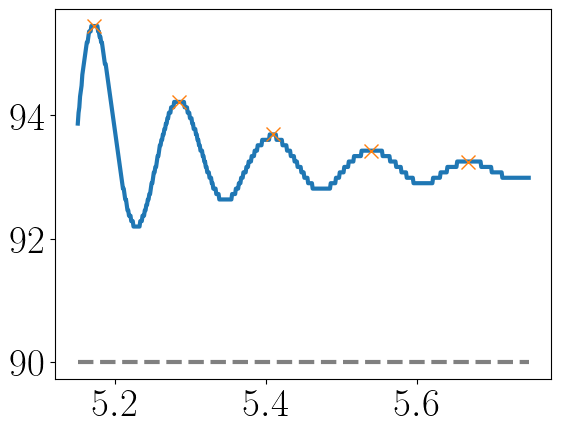

In [50]:
# Alternativ mittels Schwingungsmessung
path = "2_Messungen/quad/"
Quanser__file = pd.read_excel(path+"1.xlsx") 
Quanser__names = Quanser__file.columns.tolist()
Quanser_ = np.zeros_like(Quanser__file)
for k in range(np.size(Quanser__names)):
    Quanser_[:,k] =  Quanser__file[Quanser__names[k]]

dt = 1/1000

N_Start = int(5.15/dt)
N_Stop = int(5.75/dt)

messreihe = Quanser_[N_Start:N_Stop,11]
timeline = Quanser_[N_Start:N_Stop,0]

peaks, _ = find_peaks(messreihe, height=0)
plt.plot(timeline,messreihe)
plt.plot(timeline[peaks], messreihe[peaks], "x")
plt.grid
plt.plot(timeline,np.zeros_like(messreihe)+90, "--", color="gray")


damping_ratio = 1/len(peaks) * np.log(messreihe[peaks[0]]/messreihe[peaks[-1]]) 
D = 1/(1+(2*np.pi/damping_ratio)**2)**0.5
print('Dämpfungsgrad ', D)


T = (timeline[peaks[-1]]-timeline[peaks[0]])/len(peaks)
print('Frequenz: ',1/T)
print('Federsteifigkeit: ', ((2*np.pi/T)**2*param.J1))